In [1]:
import os
import pandas as pd
os.chdir('../../')

from operations.api import KGFarm
kgfarm = KGFarm()

(KGFarm is running in Human in the loop mode)
Connected to Stardog!
Access the Stardog UI at: https://cloud.stardog.com/


In [2]:
entity_df = pd.read_csv(r'C:\Users\niki_\Google Drive\GRAD SCHOOL\Papers\KGFarm-LFE\fertility_Diagnosis.csv')
entity_df

,season,age,childish disease,accident,surgical intervention,high fever,alcohol consumption,smoking habits,hours sitting,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


scanning missing values


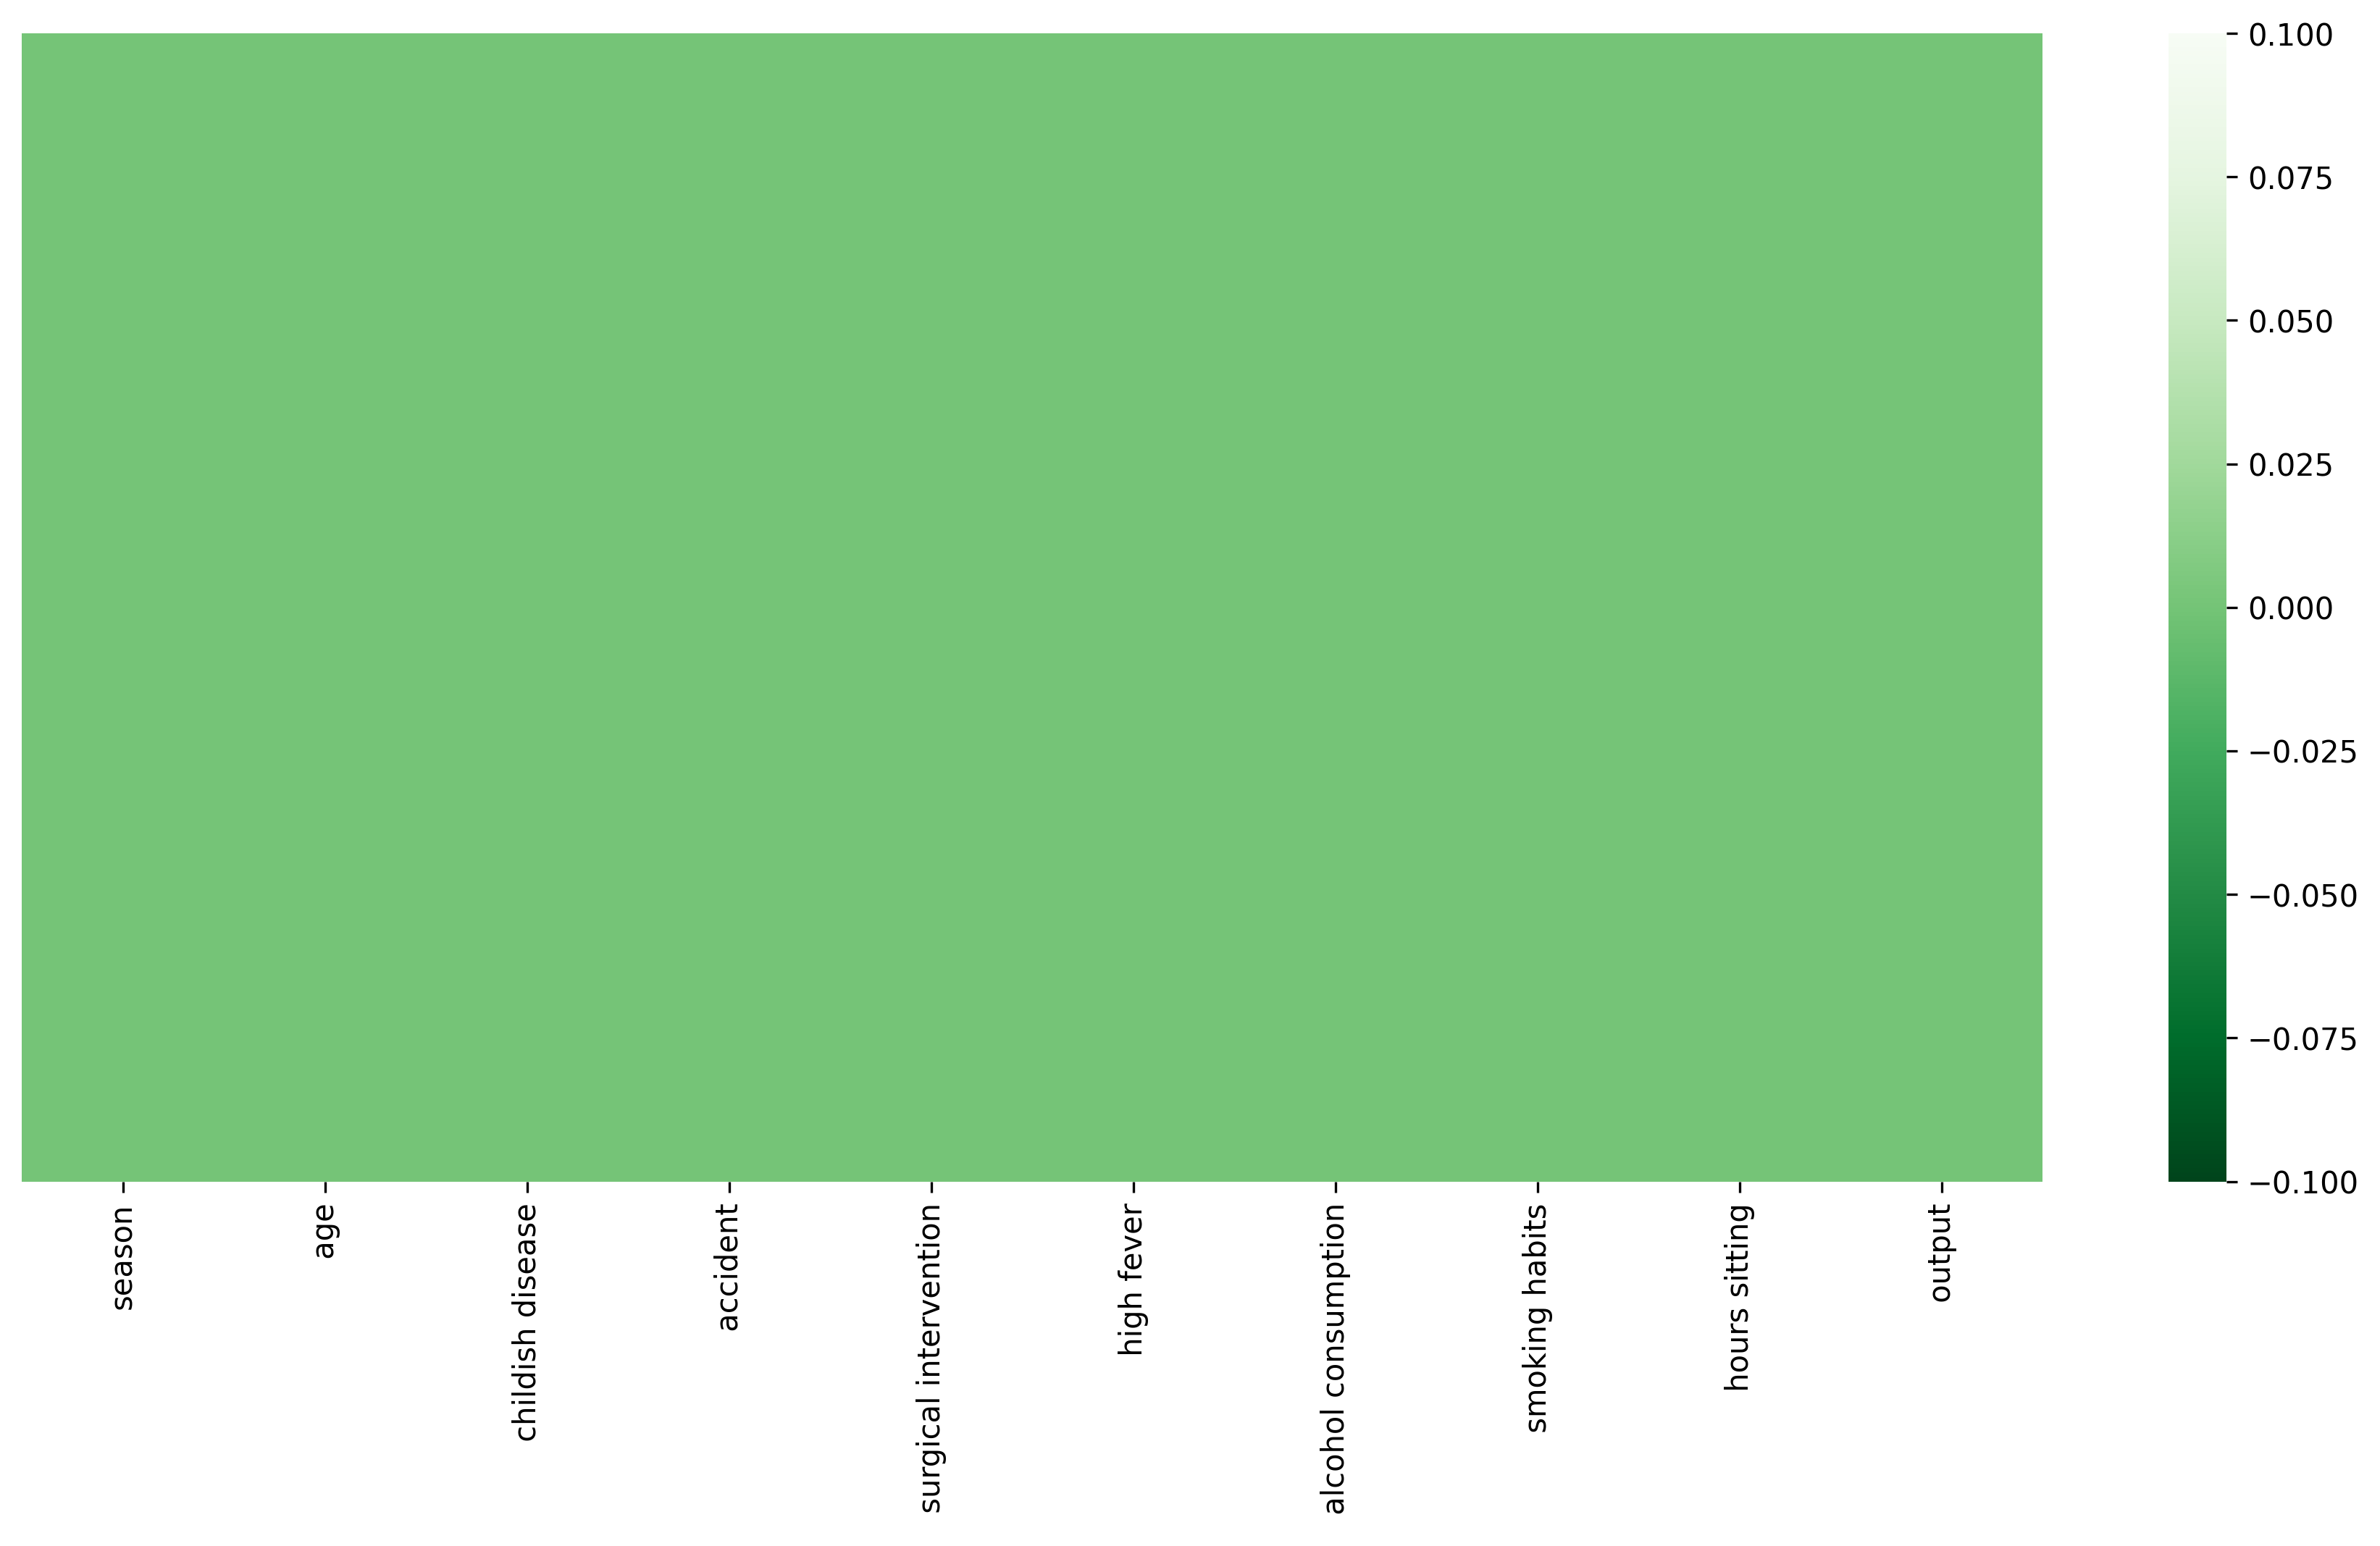

nothing to clean


,season,age,childish disease,accident,surgical intervention,high fever,alcohol consumption,smoking habits,hours sitting,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [6]:
kgfarm.recommend_cleaning_operations(entity_df)

In [7]:
tranformation_info = kgfarm.recommend_feature_transformations(entity_df)
tranformation_info

Processing unseen entity_df


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 204.07it/s]

• Insights about your entity_df:
	1.  childish disease (a numeric column) looks like a categorical feature
	2.  accident (a numeric column) looks like a categorical feature
	3.  surgical intervention (a numeric column) looks like a categorical feature


,Transformation,Package,Library,Feature,Transformation_type
0,LabelEncoder,preprocessing,sklearn,"[ childish disease, accident, surgical intervention, output]",Categorical feature encoding
1,StandardScaler,preprocessing,sklearn,[ age],Feature scaling


In [17]:
entity_df, _ = kgfarm.apply_transformation(tranformation_info.iloc[0], entity_df)
entity_df

Applying LabelEncoder transformation


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 668.23it/s]

4 feature(s) [' childish disease', ' accident', ' surgical intervention', ' output'] transformed successfully!


,season,age,childish disease,accident,surgical intervention,high fever,alcohol consumption,smoking habits,hours sitting,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [18]:
entity_df, _ = kgfarm.apply_transformation(tranformation_info.iloc[1], entity_df)
entity_df

CAUTION: Make sure you apply StandardScaler transformation only on the train set (This ensures there is no over-fitting due to feature leakage)
Use the transformation_model returned from this api to transform test set independently.

Applying StandardScaler transformation
1 feature(s) [' age'] transformed successfully!


,season,age,childish disease,accident,surgical intervention,high fever,alcohol consumption,smoking habits,hours sitting,output
0,-0.33,0.173970,0,1,1,0,0.8,0,0.88,0
1,-0.33,2.245043,1,0,1,0,0.8,1,0.31,1
2,-0.33,-1.400045,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.671028,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.008284,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.008284,1,0,0,0,1.0,-1,0.50,0
96,-1.00,-0.488773,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.008284,1,1,1,0,1.0,-1,0.31,0
98,-1.00,-0.240244,1,0,1,0,1.0,0,0.19,0


In [9]:
dependent_variable = ' output'
independent_variables = [feature for feature in list(entity_df.columns) if feature != dependent_variable]

X = entity_df[independent_variables]
y = entity_df[dependent_variable]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.46it/s]


Analyzing features


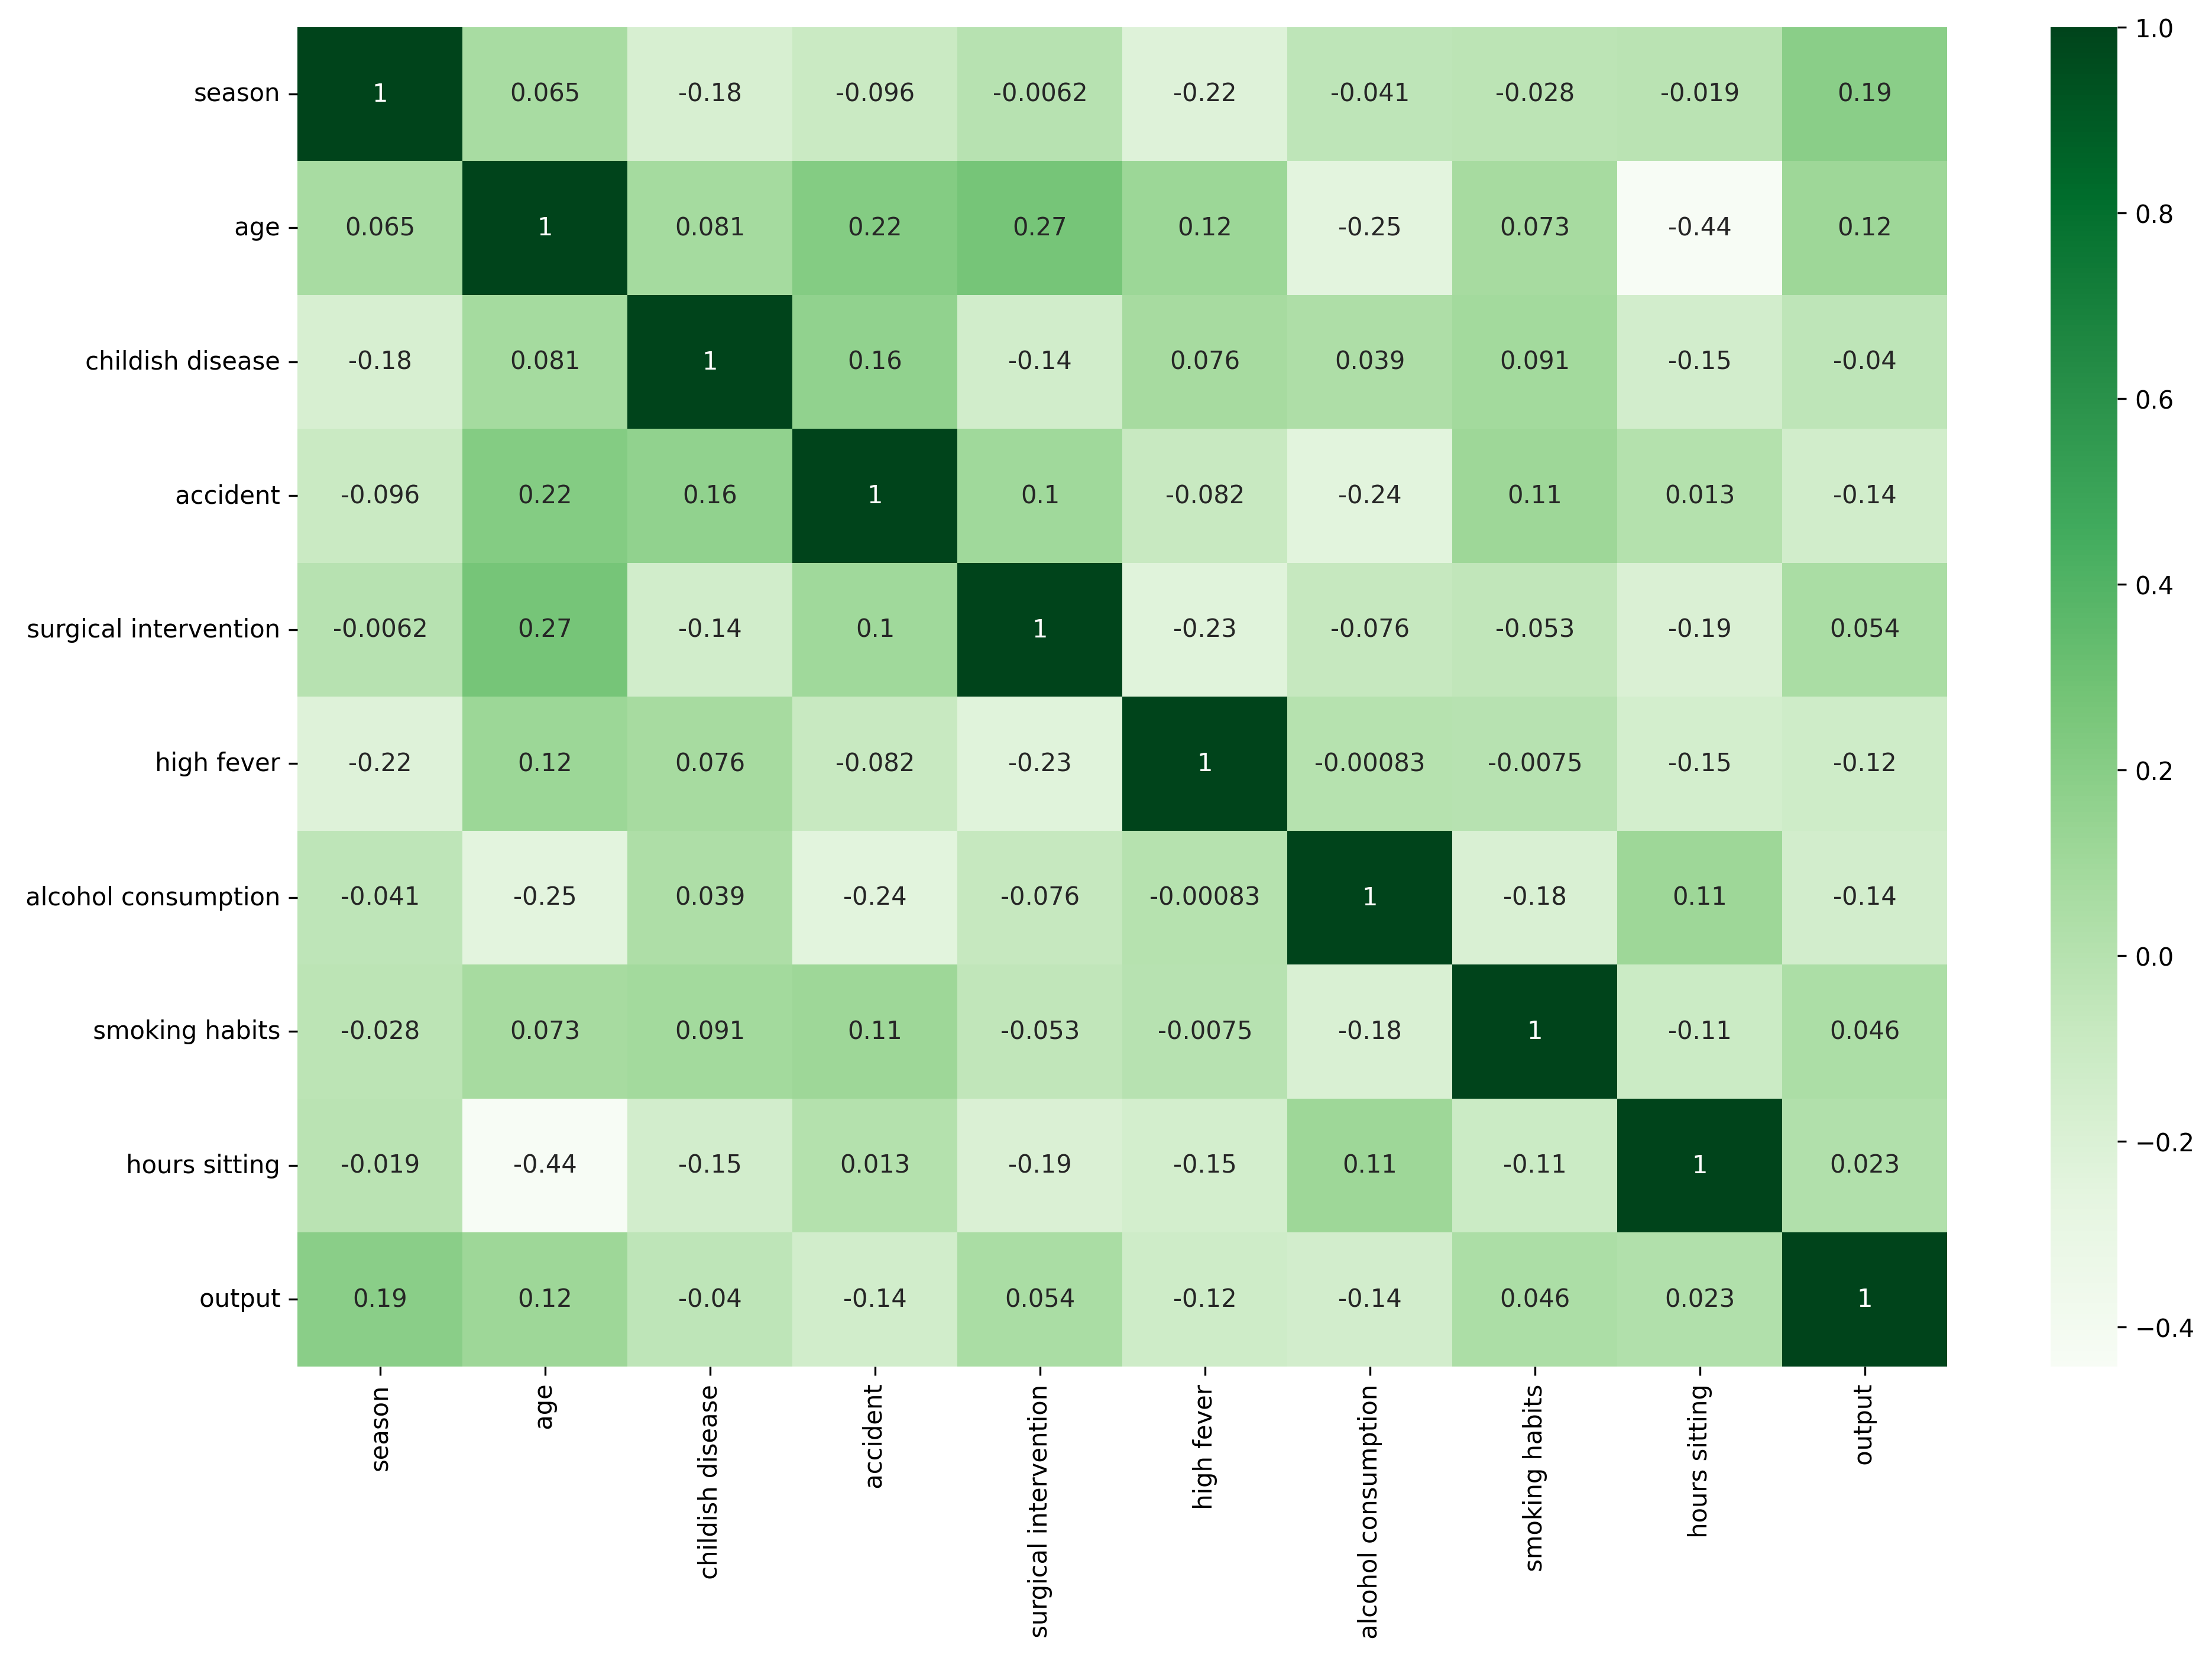

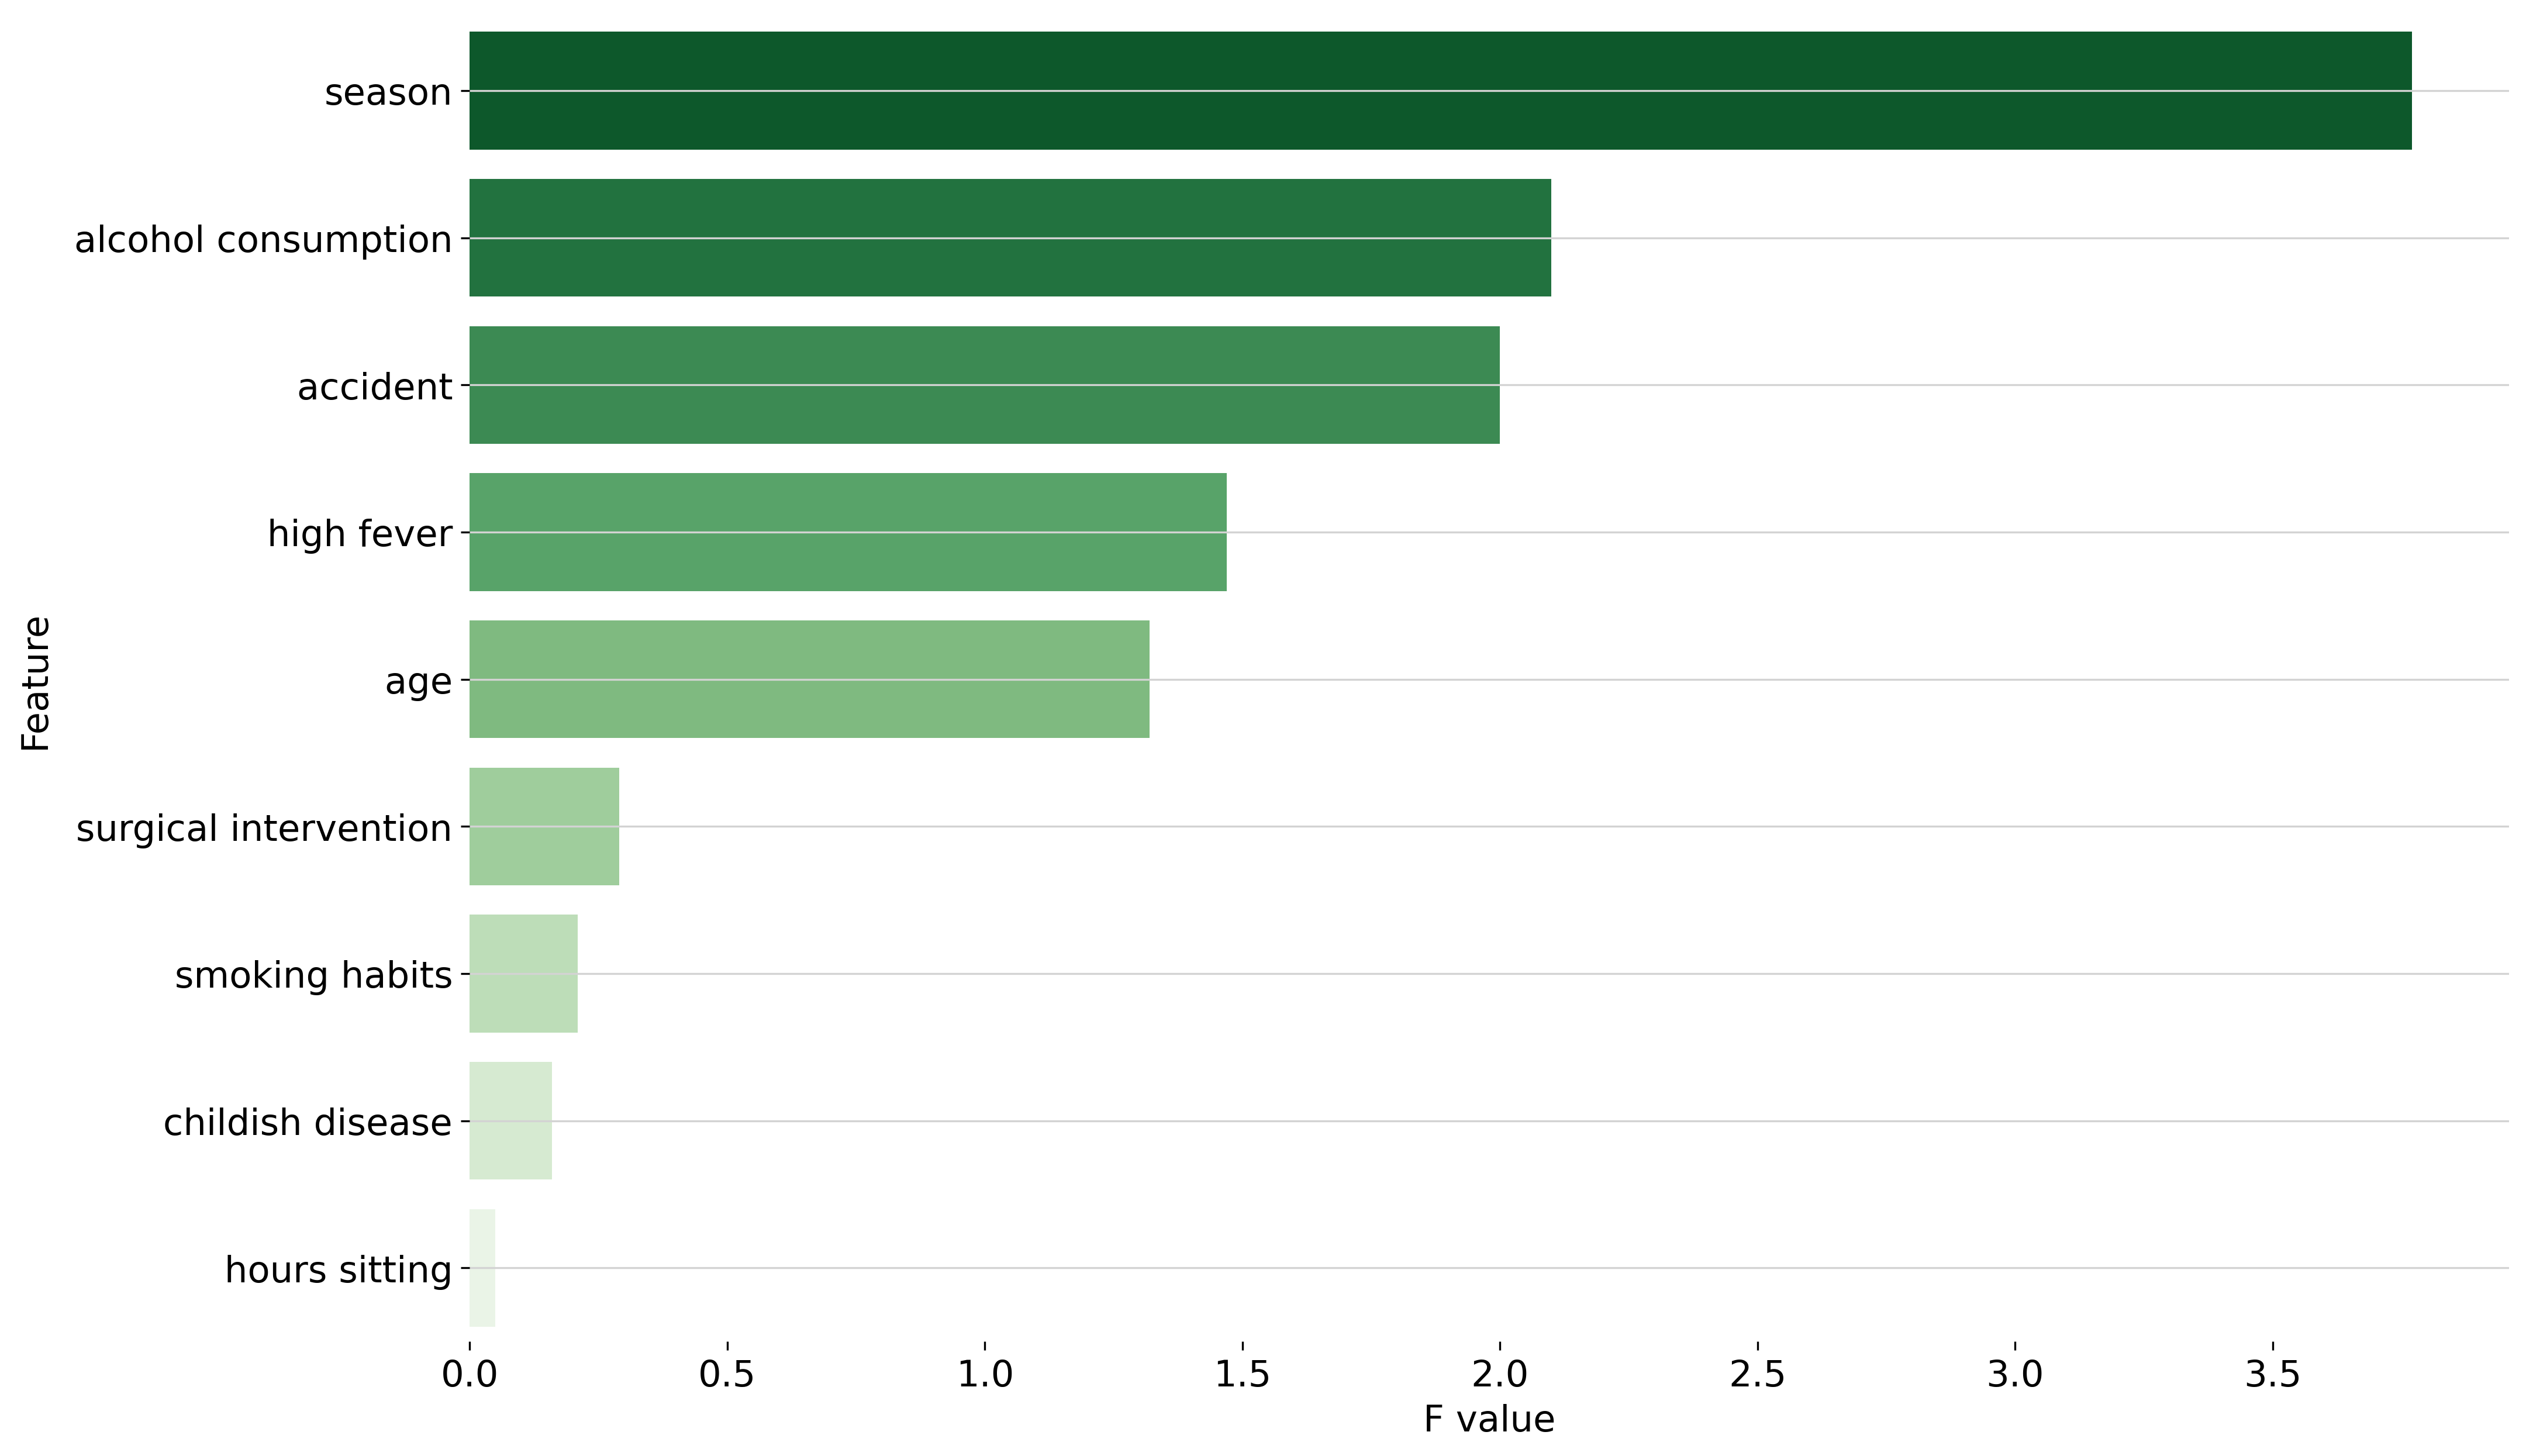

Enter k (where k is the top-k ranked features out of 10 feature(s) 5
Top 5 feature(s) ['season', ' alcohol consumption', ' accident', ' high fever', ' age'] were selected based on highest F-value


,season,alcohol consumption,accident,high fever,age
0,-0.33,0.8,1,0,0.173970
1,-0.33,0.8,0,0,2.245043
2,-0.33,1.0,0,0,-1.400045
3,-0.33,1.0,1,0,0.671028
4,-0.33,0.8,1,0,0.008284
...,...,...,...,...,...
95,-1.00,1.0,0,0,0.008284
96,-1.00,0.8,0,0,-0.488773
97,-1.00,1.0,1,0,0.008284
98,-1.00,1.0,0,0,-0.240244


In [62]:
X, y = kgfarm.select_features(entity_df, dependent_variable=' output', select_by='anova')
X

In [63]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier(n_estimators=100)
lrc = LogisticRegression()

In [64]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(rfc, X, y, cv = 5, scoring='f1')#.mean()
print(scores)
scores1 = cross_val_score(rfc, X, y, cv = 5, scoring='precision')#.mean()
print(scores1)
scores2 = cross_val_score(rfc, X, y, cv = 5, scoring='recall')#.mean()
print(scores2)

[0.         0.         0.66666667 0.4        0.        ]
[0.  0.  1.  0.5 0. ]
[0.         0.         0.5        0.33333333 0.        ]


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
random_forest_classifier=RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)
f1_random_forest_classifier = round(f1_score(y_test, y_pred), 3)


kgfarm_approach = {'Random forest classifier': f1_random_forest_classifier}
kgfarm_approach

{'Random forest classifier': 0.286}